In [72]:
import random

people = [
    "Салтанат Санатова",
    "Рустам Билалов",
    "Раймбек Жузжасар",
    "Олжас Ромазанов",
    "Леша Котов",
    "Леша Кондратьев",
    "Камила Нурсаитова",
    "Гайни Альмуханова",
    "Аяжан Найманбаева",
    "Арсен Шегебаев",
    "Ангелина Кардашова",
    "Адиль Абылкакимов",
    "Аделя Кунсеитова",
    "Аделя Акбердина",
    "Абдумажид Турдиев"
]

selected_person = random.choice(people)
print(selected_person)


Леша Кондратьев


In [30]:
import pandas as pd
from google.oauth2 import service_account

project_id = 'kolesa-group'
credentials = 'D:/Kolesa/kolesa_work/credentials/BQ.json'
credentials = service_account.Credentials.from_service_account_file(credentials)

In [34]:
q = """SELECT execution_date, count(*) as y FROM `krisha-83abb.dwh.live_adverts` WHERE execution_date >= "2021-01-01"
group by 1
order by 1"""

In [35]:
df = pd.read_gbq(q, project_id=project_id, credentials=credentials, dialect='standard', progress_bar_type = 'tqdm')

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   execution_date  1169 non-null   dbdate
 1   y               1169 non-null   Int64 
dtypes: Int64(1), dbdate(1)
memory usage: 19.5 KB


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   execution_date  1169 non-null   dbdate
 1   y               1169 non-null   Int64 
dtypes: Int64(1), dbdate(1)
memory usage: 19.5 KB


In [47]:
df[df['y'] == df['y'].max()]

,execution_date,y
129,2021-05-10,615283


In [54]:
615283/2

307641.5

In [58]:
(df.iloc[130]['y'] + df.iloc[128]['y'])/2

342515.5

In [65]:
df.iloc[129]['y']

615283

In [67]:
df['y'] = df['y'].replace(615283,342515)

<AxesSubplot:>

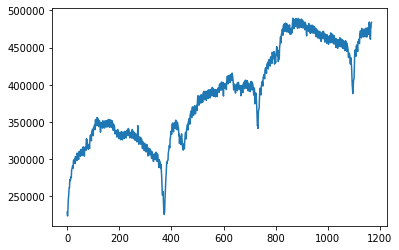

In [80]:
df['y'].plot()

In [152]:
df['execution_date'] = pd.to_datetime(df['execution_date'], format='%Y-%m-%d')

In [153]:
train = df[df['execution_date'] < '2023-01-01']

In [154]:
test = df[df['execution_date'] >= '2023-01-01']

In [155]:
output_errors = np.average(np.abs(y_pred - y_true))

In [156]:
y_true = test['y']

In [159]:
y_pred = y_true.copy()

In [160]:
test_a = test.copy()

In [161]:
test_a['y'] = 344948

In [168]:
y_pred = test_a['y']

In [171]:
output_errors = np.average(np.abs(y_pred - y_true))

In [172]:
output_errors

112066.96355353075

In [173]:
import prophet

Importing plotly failed. Interactive plots will not work.


In [ ]:
prophet.Prophet()

In [125]:
344948

344948

In [124]:
y_pred

344948

Прогноз периода - 31.12.2024


In [ ]:
Как то оценить , через метрики

In [ ]:
какие метрики mae

In [ ]:
кросс валидацию

In [ ]:
MAE

ML System Design Doc - [RU]
Дизайн ML системы - <Продукт> <MVP or Production System> <Номер>
Шаблон ML System Design Doc от телеграм-канала Reliable ML

Рекомендации по процессу заполнения документа (workflow) - здесь.
Детальный доклад о том, что такое ML System Design Doc и о том, как, когда и зачем его составлять - тут.
Термины и пояснения
Итерация - это все работы, которые совершаются до старта очередного пилота
БТ - бизнес-требования
EDA - Exploratory Data Analysis - исследовательский анализ данных
Product Owner, Data Scientist - роли, которые заполняют соответствующие разделы
В этом шаблоне роль Data Scientist совмещает в себе компетенции классического Data Scientist с упором на исследования и ML Engineer & ML Ops роли с акцентом на продуктивизацию моделей
Для вашей организации распределение ролей может быть уточнено в зависимости от операционной модели
1. Цели и предпосылки
1.1. Зачем идем в разработку продукта?
Бизнес-цель Product Owner
Почему станет лучше, чем сейчас, от использования ML Product Owner & Data Scientist
Что будем считать успехом итерации с точки зрения бизнеса Product Owner
1.2. Бизнес-требования и ограничения
Краткое описание БТ и ссылки на детальные документы с бизнес-требованиями Product Owner
Бизнес-ограничения Product Owner
Что мы ожидаем от конкретной итерации Product Owner.
Описание бизнес-процесса пилота, насколько это возможно - как именно мы будем использовать модель в существующем бизнес-процессе? Product Owner
Что считаем успешным пилотом? Критерии успеха и возможные пути развития проекта Product Owner
1.3. Что входит в скоуп проекта/итерации, что не входит
На закрытие каких БТ подписываемся в данной итерации Data Scientist
Что не будет закрыто Data Scientist
Описание результата с точки зрения качества кода и воспроизводимости решения Data Scientist
Описание планируемого технического долга (что оставляем для дальнейшей продуктивизации) Data Scientist
1.4. Предпосылки решения
Описание всех общих предпосылок решения, используемых в системе – с обоснованием от запроса бизнеса: какие блоки данных используем, горизонт прогноза, гранулярность модели, и др. Data Scientist
2. Методология Data Scientist
2.1. Постановка задачи
Что делаем с технической точки зрения: рекомендательная система, поиск аномалий, прогноз, оптимизация, и др. Data Scientist
2.2. Блок-схема решения
Блок-схема для бейзлайна и основного MVP с ключевыми этапами решения задачи: подготовка данных, построение прогнозных моделей, оптимизация, тестирование, закрытие технического долга, подготовка пилота, другое. Data Scientist
Пример возможной блок схемы
Схема обязательно включает в себя архитектуру бейзлайна. Если бейзлайн и основной MVP отличаются несущественно, то это может быть одна блок-схема. Если значительно, то рисуем две: отдельно для бейзлайна, отдельно для основного MVP.
Если блок-схема шаблонна - т.е. её можно скопировать и применить к разным продуктам, то она некорректна. Блок-схема должна показывать схему решения для конкретной задачи, поставленной в части 1.

2.3. Этапы решения задачи Data Scientist
Для каждого этапа по результатам EDA описываем - отдельно для бейзлайна и отдельно для основного MVP - все про данные и технику решения максимально конкретно. Обозначаем необходимые вводные, технику предполагаемого решения и что ожидаем получить на выходе, чтобы перейти к следующему этапу.
Как правило, детальное и структурированное заполнение раздела 2.3 возможно только по результатам EDA.
Если описание в дизайн доке шаблонно - т.е. его можно скопировать и применить к разным продуктам, то оно некорректно. Дизайн док должен показывать схему решения для конкретной задачи, поставленной в части 1.
Примеры этапов:

Этап 2 - Подготовка прогнозных моделей
Этап 3 - Интерпретация моделей (согл. с заказчиком)
Этап 4 - Интеграция бизнес правил для расчета бизнес-метрик качества мрдели
Этап 5 - Подготовка инференса модели по итерациям
Этап 6 - Интеграция бизнес правил
Этап 7 - Разработка оптимизатора (выбор оптимальной итерации)
Этап 8 - Подготовка финального отчета для бизнеса
Этап 1 - это обычно, подготовка данных.

В этом этапе должно быть следующее:

Данные и сущности, на которых будет обучаться ваша модель машинного обучения. Отдельная таблица для целевой переменной (либо целевых переменных разных этапов), отдельная таблица – для признаков.
Название данных	Есть ли данные в компании (если да, название источника/витрин)	Требуемый ресурс для получения данных (какие роли нужны)	Проверено ли качество данных (да, нет)
Продажи	DATAMARTS_SALES_PER_DAY	DE/DS	+
...	...	...	...
Краткое описание результата этапа - что должно быть на выходе: витрины данных, потоки данных, др.
Чаще всего заполнение раздела невозможно без EDA.

Этапы 2 и далее, помимо подготовки данных.

Описание техники для каждого этапа должно включать описание отдельно для MVP и отдельно для бейзлайна:

Описание формирования выборки для обучения, тестирования и валидации. Выбор репрезентативных данных для экспериментов, обучения и подготовки пилота (от бизнес-цели и репрезентативности данных с технической точки зрения) Data Scientist
Горизонт, гранулярность, частоту необходимого пересчета прогнозных моделей Data Scientist
Определение целевой переменной, согласованное с бизнесом Data Scientist
Какие метрики качества используем и почему они связаны с бизнес-результатом, обозначенным Product Owner в разделах 1 и 3. Пример - WAPE <= 50% для > 80% категорий, bias ~ 0. Возможна формулировка в терминах относительно бейзлайна, количественно. Для бейзлайна могут быть свои целевые метрики, а может их вообще не быть (если это обосновано) Data Scientist
Необходимый результат этапа. Например, необходимым результатом может быть не просто достижение каких-либо метрик качества, а включение в модели определенных факторов (флаг промо для прогноза выручки, др.) Data Scientist
Какие могут быть риски и что планируем с этим делать. Например, необходимый для модели фактор (флаг промо) окажется незначимым для большинства моделей. Или для 50% моделей будет недостаточно данных для оценки Data Scientist
Верхнеуровневые принципы и обоснования для: feature engineering, подбора алгоритма решения, техники кросс-валидации, интерпретации результата (если применимо).
Предусмотрена ли бизнес-проверка результата этапа и как будет проводиться Data Scientist & Product Owner
3. Подготовка пилота
3.1. Способ оценки пилота
Краткое описание предполагаемого дизайна и способа оценки пилота Product Owner, Data Scientist with AB Group
3.2. Что считаем успешным пилотом
Формализованные в пилоте метрики оценки успешности Product Owner

3.3. Подготовка пилота
Что можем позволить себе, исходя из ожидаемых затрат на вычисления. Если исходно просчитать сложно, то описываем этап расчетов ожидаемой вычислительной сложности на эксперименте с бейзлайном. И предусматриваем уточнение параметров пилота и установку ограничений по вычислительной сложности моделей. Data Scientist
4. Внедрение для production систем, если требуется
Заполнение раздела 4 требуется не для всех дизайн документов. В некоторых случаях результатом итерации может быть расчет каких-то значений, далее используемых в бизнес-процессе для пилота.

4.1. Архитектура решения
Блок схема и пояснения: сервисы, назначения, методы API Data Scientist
4.2. Описание инфраструктуры и масштабируемости
Какая инфраструктура выбрана и почему Data Scientist
Плюсы и минусы выбора Data Scientist
Почему финальный выбор лучше других альтернатив Data Scientist
4.3. Требования к работе системы
SLA, пропускная способность и задержка Data Scientist
4.4. Безопасность системы
Потенциальная уязвимость системы Data Scientist
4.5. Безопасность данных
Нет ли нарушений GDPR и других законов Data Scientist
4.6. Издержки
Расчетные издержки на работу системы в месяц Data Scientist
4.5. Integration points
Описание взаимодействия между сервисами (методы API и др.) Data Scientist
4.6. Риски
Описание рисков и неопределенностей, которые стоит предусмотреть Data Scientist
Материалы для дополнительного погружения в тему
Шаблон ML System Design Doc [EN] от AWS и статья с объяснением каждого раздела
Верхнеуровневый шаблон ML System Design Doc от Google и описание общих принципов его заполнения.
ML Design Template от ML Engineering Interviews
Статья Design Documents for ML Models на Medium. Верхнеуровневые рекомендации по содержанию дизайн-документа и объяснение, зачем он вообще нужен
Краткий Canvas для ML-проекта от Made with ML. Подходит для верхнеуровневого описания идеи, чтобы понять, имеет ли смысл идти дальше.